# Customer Segmentation - Wholesale Customers Data

## Attribute Information:
  
- FRESH: annual spending on fresh products (Continuous);
- MILK: annual spending on milk products (Continuous);
- GROCERY: annual spending on grocery products (Continuous);
- FROZEN: annual spending on frozen products (Continuous)
- DETERGENTS_PAPER: annual spending on detergents and paper products (Continuous)
- DELICATESSEN: annual spending on delicatessen products (Continuous);
- CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
- REGION: customers Region- Lisnon, Oporto or Other (Nominal)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

**Load the data**

In [2]:
df=pd.read_csv('Wholesale customers data.csv')

**Check head**

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


**Check Info**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


**Check Summary Stats**

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Plot Correlation Heat map**

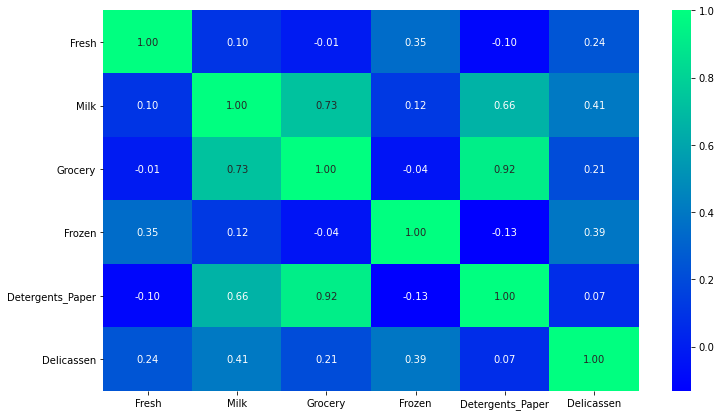

In [27]:
plt.figure(figsize=(12,7))
sns.heatmap(df.iloc[:,2:].corr(),annot=True, fmt='.2f',cmap='winter')
plt.show()

**Scale the data**

In [28]:
sc=StandardScaler()

In [29]:
scaled_df=pd.DataFrame(sc.fit_transform(df.iloc[:,2:]),columns=df.iloc[:,2:].columns)

**Elbow Plot**

In [30]:
wss=[]
for i in range(2,15):
    k=KMeans(n_clusters=i,random_state=123)
    k.fit(scaled_df)
    wss.append(k.inertia_)   

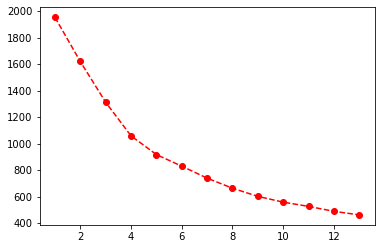

In [47]:
plt.plot(np.arange(1,14,1),wss,'ro--');

**Lets implement for k=3**

In [38]:
k=KMeans(n_clusters=3,random_state=0)
k.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

In [39]:
df_k_3=df.iloc[:,2:]

In [40]:
df_k_3['Clusters']=k.labels_

df_k_3.groupby('Clusters').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Clusters,,,,,,
0,5635.770642,10034.577982,15765.623853,1457.587156,6768.009174,1737.614679
1,13618.905660,3143.091195,3881.770440,3471.050314,854.930818,1192.135220
2,25770.769231,35160.384615,41977.384615,6844.538462,19867.384615,7880.307692


**Interpretations**

> Cluster 1 lowest spenders on Fresh & Frozen

> Cluster 2 lowest spenders on Milk,Grocery, Delicassen & Detergents_Paper

> Cluster 3 highest spenders across all categories

**Lets implement for k=5**

In [60]:
k=KMeans(n_clusters=5,random_state=0)
k.fit(scaled_df)

KMeans(n_clusters=5, random_state=0)

In [61]:
df_k_5=df.iloc[:,2:]

In [62]:
df_k_3['Clusters']=k.labels_

df_k_3.groupby('Clusters').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Clusters,,,,,,
0,9092.155556,2967.759259,3807.411111,2271.759259,989.814815,978.962963
1,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
2,32957.984127,4997.349206,5884.761905,8422.841270,954.603175,2462.968254
3,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000
4,5754.166667,10866.604167,16607.104167,1464.125000,7202.875000,1813.385417


**Interpretations**

>Cluster 1 Low spenders on Delicassen, Grocery, & Milk

>Cluster 2 Highest Grocery & Detergents_Paper spenders

>Cluster 3 Medium spenders on all items except Fresh

>Cluster 4 High Spenders on Delicassen, Fresh, Milk & Frozen and spends lowest on Detergents_Paper

>Cluster 5 Lowest spenders Fresh and Frozen


Based on the above cluster profiles, segment the customers and make suitable offers to those who spends less, provide Loyalty offers to high spenders and make policies to migrate medium spenders to high spenders profile. This is just an anonymous idea. Use your business acumen and devise techniques/offers using this analysis.

                                                  Happy Learning